I used ChatGPT (https://chatgpt.com/) to outline and plan the code for this project. I used Visual Studio Code with GitHub Copilot assisting to write the final code for this project.

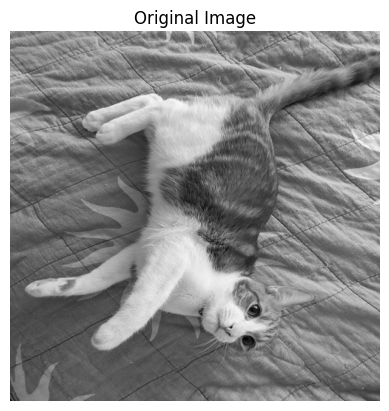

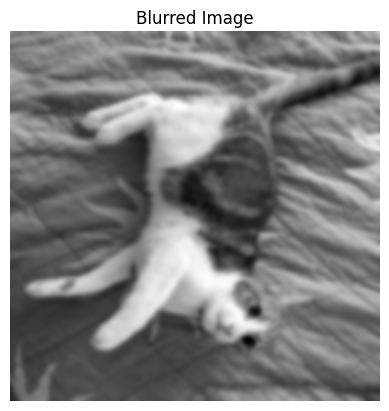

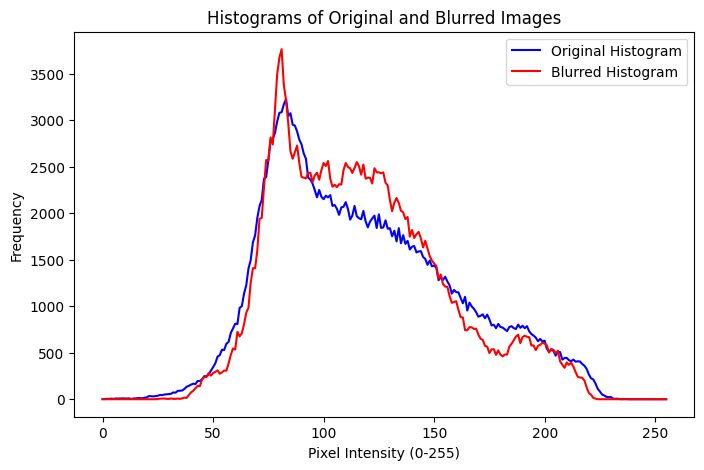

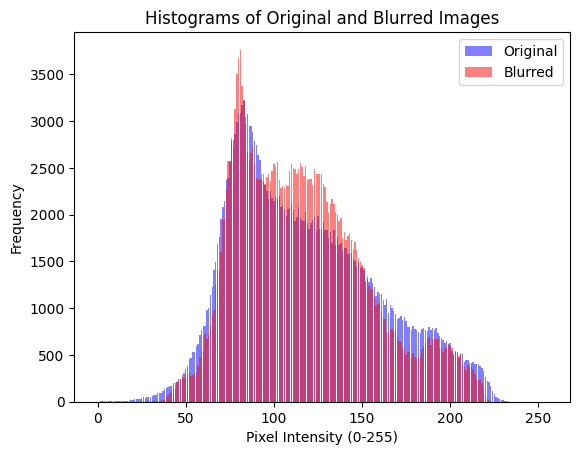

KS Statistic: 0.15625, P-value: 0.0038097429114247482
Results are significantly different.
Blurred image saved as 'blurred_cat.png'.
Downscaled blurred image saved as 'downscaled_blurred_cat.png'.


In [37]:
# first import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from PIL import Image

original_img = Image.open('cat.png').convert('L')  # load image and convert to greyscale ('L' mode means 8-bit pixels)
resized_img = original_img.resize((500, 500), Image.LANCZOS) # resize to 500x500 pixels (LANCZOS filter for high-quality downsampling)
original_array = np.array(resized_img)  # convert image to numpy array (needed for image processing)


# display the original image
plt.imshow(original_array, cmap='gray')  # stores image in the current figure memory
plt.title('Original Image')
plt.axis('off')
plt.show()  # renders and displays everything in the current figure

# apply Gaussian blur with a standard deviation (sigma) of 3
blurred_array = gaussian_filter(original_array, sigma=3)

# display the blurred image
plt.imshow(blurred_array, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# calculate the histogram of the original and blurred images
original_hist, original_bins = np.histogram(original_array.flatten(), bins=256, range=[0, 255])
blurred_hist, blurred_bins = np.histogram(blurred_array.flatten(), bins=256, range=[0, 255])

# plot the histograms on the same figure
plt.figure(figsize=(8, 5))
plt.plot(original_hist, label='Original Histogram', color='blue')   # plots a continuous line for the histogram
plt.plot(blurred_hist, label='Blurred Histogram', color='red')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.title('Histograms of Original and Blurred Images')
plt.legend()
plt.show()

plt.bar(range(256), original_hist, label='Original', color='blue', alpha=0.5)   # plots a traditional bar histogram
plt.bar(range(256), blurred_hist, label='Blurred', color='red', alpha=0.5)
plt.legend()
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.title('Histograms of Original and Blurred Images')
plt.legend()
plt.show()

# perform a statistical test (KS test) to compare the two histograms
ks_statistic, p_value = stats.ks_2samp(original_hist, blurred_hist)
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")

# interpret the results of the KS test
if p_value < 0.05:
    print("Results are significantly different.")
else:
    print("Results are not significantly different.")

# save the blurred image as a new file
blurred_img = Image.fromarray(blurred_array.astype(np.uint8))  # convert the numpy array back to 8-bit unsigned integer format (pixel format for images)
blurred_img.save('blurred_cat.png')  # save the blurred image
print("Blurred image saved as 'blurred_cat.png'.")
downscaled_img = blurred_img.resize((250, 250), Image.LANCZOS)  # downscale the blurred image to 250x250 pixels
downscaled_img.save('downscaled_blurred_cat.png')  # save the downscaled image
print("Downscaled blurred image saved as 'downscaled_blurred_cat.png'.")